<a href="https://colab.research.google.com/github/ernestojr-7/Rede-Neural-com-Numpy/blob/main/Rede_neural_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A base de dados

### Carregando o dataset

In [87]:
import pandas as pd

dados = pd.read_csv('Dataset/Bicicletas.csv')

### Conhecendo a base de dados

In [88]:
dados.head()

,clima,temperatura,bicicletas_alugadas
0,2,0.363625,985
1,2,0.353739,801
2,1,0.189405,1349
3,1,0.212122,1562
4,1,0.229270,1600


In [89]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'temperatura')

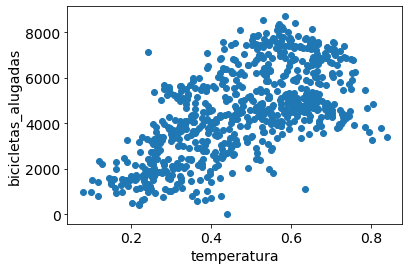

In [90]:
plt.rcParams.update({'font.size': 14})
plt.scatter(dados['temperatura'],dados['bicicletas_alugadas'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('temperatura')

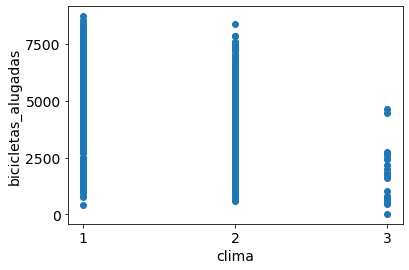

In [91]:
plt.scatter(dados['clima'],dados['bicicletas_alugadas'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('clima')
plt.rcParams.update({'font.size': 22})
indice=[1,2,3]
plt.xticks(indice, fontsize=14);

### Normalizando a base de dados

In [92]:
import numpy as np

In [93]:
y = dados['bicicletas_alugadas'].values

In [94]:
X = dados[['clima','temperatura']].values
print(X)

[[2.       0.363625]
 [2.       0.353739]
 [1.       0.189405]
 ...
 [2.       0.2424  ]
 [1.       0.2317  ]
 [2.       0.223487]]


In [95]:
xmax = np.amax(X, axis=0)
xmax

array([3.      , 0.840896])

In [96]:
xmax = np.amax(X,axis=0)
X = X/xmax
print(X)

[[0.66666667 0.43242565]
 [0.66666667 0.42066914]
 [0.33333333 0.22524188]
 ...
 [0.66666667 0.28826395]
 [0.33333333 0.27553942]
 [0.66666667 0.26577246]]


In [97]:
ymax=np.amax(y)
y = y/ymax
print(y)

[0.11303649 0.09192105 0.15480835 0.17925178 0.18361258 0.18430112
 0.17328437 0.11005279 0.09433096 0.15159513 0.14493918 0.13334863
 0.16134955 0.16307092 0.14321781 0.13816846 0.11475786 0.07837962
 0.18935047 0.2211384  0.17707138 0.11257746 0.11315125 0.16249713
 0.22779435 0.05806748 0.04946064 0.13392242 0.12600413 0.12577462
 0.17225155 0.15607069 0.1751205  0.17787468 0.19600643 0.11533165
 0.18625201 0.19646546 0.17557953 0.18418637 0.17649759 0.20036723
 0.16892357 0.18235024 0.21953179 0.20828552 0.24271288 0.28402571
 0.33589626 0.1876291  0.20794124 0.12703695 0.1663989  0.21999082
 0.20736745 0.16766123 0.22595823 0.27564838 0.16593987 0.2124168
 0.24489328 0.193367   0.22308928 0.23835208 0.06942851 0.21482672
 0.24477852 0.21700711 0.07149415 0.22687629 0.24466376 0.27736975
 0.23479458 0.23594216 0.25154923 0.31489557 0.37170071 0.35770025
 0.28356667 0.23835208 0.3101905  0.24340142 0.21402341 0.25361487
 0.28643562 0.19428506 0.23272894 0.27828781 0.17626807 0.19336

### Funções de ativação

In [98]:
def sigmoid(s):
    return 1/(1+np.exp(-s))

def relu(s):
    return np.maximum(0, s)

### Criando a estrutura da rede

In [188]:
arquitetura = [
    {"dim_entrada": 2, "dim_saida": 4, "ativacao": "relu"},
    {"dim_entrada": 4, "dim_saida": 4, "ativacao": "relu"},
    {"dim_entrada": 4, "dim_saida": 2, "ativacao": "relu"},
    {"dim_entrada": 2, "dim_saida": 1, "ativacao": "sigmoid"}
]

### Pesos e viés

In [157]:
# inicializa os pesos de cada camada
def inicia_camadas(arquitetura, seed = 22):
    # inicia os valores aleatórios
    np.random.seed(seed)
    # numero de camadas da rede neural
    numero_de_camadas = len(arquitetura)
    # inicia armazenamento de parametros
    valores_parametros = {}
    
    # itera nas camadas da rede
    for indice, camada in enumerate(arquitetura):
        
        indice_camada = indice + 1
        
        # extrai o numero de nodos nas camadas
        tamanho_camada_entrada = camada["dim_entrada"]
        tamanho_camada_saida   = camada["dim_saida"]
        
        # inicia os valores na matriz de pesos P
        # e o vetor de viés ou bias b
        valores_parametros['P' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, tamanho_camada_entrada)  * 0.1
        valores_parametros['b' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, 1) * 0.1
        
    return valores_parametros

#### <font color='00FF7F' style='font-size: 24px;'>Entendendo melhor estrutura da rede</font><hr style='border: 2px solid black;'>


In [158]:
arquitetura[0]

{'ativacao': 'relu', 'dim_entrada': 2, 'dim_saida': 4}

In [159]:
# tamanho_camada_saida e o numero de linhas da matriz
# tamanho_camada_entrada e o numero de colunas
# inicia armazenamento de parametros
valores_parametros = {}
for indice, camada in enumerate(arquitetura):
  indice_camada = indice + 1
        
  # extrai o numero de nodos nas camadas
  tamanho_camada_entrada = camada["dim_entrada"]
  tamanho_camada_saida = camada["dim_saida"]
  print(f'tamanho entrada: {tamanho_camada_entrada}')
  print(f'tam saida:       {tamanho_camada_saida}')
  print(f'camada:          {indice_camada}')
  print('_'*20)
        
  # inicia os valores na matriz de pesos P
  # e o vetor de viés ou bias b
  valores_parametros['P' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, tamanho_camada_entrada)  * 0.1
  valores_parametros['b' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, 1) * 0.1
print(valores_parametros)
# print(valores_parametros['b1'])

tamanho entrada: 2
tam saida:       4
camada:          1
____________________
tamanho entrada: 4
tam saida:       1
camada:          2
____________________
{'P1': array([[ 0.05916665, -0.01832566],
       [ 0.10198547, -0.14824655],
       [ 0.08463119,  0.04979401],
       [ 0.01265042, -0.14188106]]), 'b1': array([[-0.02517741],
       [-0.15466746],
       [-0.20826519],
       [ 0.32797454]]), 'P2': array([[ 0.09708613,  0.17925929, -0.04290133,  0.0696198 ]]), 'b2': array([[0.06974163]])}


### Propagação da rede

In [160]:
def propaga_uma_camada(X_neuronio, pesos, bias, ativacao="relu"):
    # cálculo da entrada para a função de ativação
    # X_neuronio equivale o 'X' de cada neuronio
    Saida_atual = np.dot(pesos, X_neuronio) + bias
    # Saida_atual += bias.T
    
    # selecao da funcao de ativacao
    if ativacao is "relu":
        func_ativacao = relu
    elif ativacao is "sigmoid":
        func_ativacao = sigmoid
    else:
        raise Exception('Funcao nao implementada ainda!')
        
    # retorna a ativação calculada Ativado_atual e a matriz intermediária Saida
    return func_ativacao(Saida_atual), Saida_atual

In [161]:
def propaga_total(X, valores_parametros, arquitetura):
    # memoria temporaria para a retropropagacao
    memoria = {}
    # O vetor X é a ativação para a camada 0 
    Ativado_atual = X
    
    # iterações para as camadas
    for indice, camada in enumerate(arquitetura):
        # a numeração das camadas começa de 1
        indice_camada = indice + 1
        # utiliza a ativação da iteração anterior
        Ativado_anterior = Ativado_atual
        
        # extrai a função de ativação para a camada atual
        func_ativacao_atual = camada["ativacao"]
        # extrai os pesos da camada atual
        Pesos_atual = valores_parametros["P" + str(indice_camada)]
        # extrai o bias para a camada atual
        
        b_atual = valores_parametros["b" + str(indice_camada)]
        # cálculo da ativação para a camada atual
        Ativado_atual, Saida_atual = propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, func_ativacao_atual)
        
        # salva os valores calculados na memória
        memoria["A" + str(indice)] = Ativado_anterior
        memoria["Z" + str(indice_camada)] = Saida_atual
       
    # retorna o vetor predito e um dicionário contendo os valores intermediários
    return Ativado_atual, memoria

### Testando a rede

In [170]:
X

array([[0.66666667, 0.43242565],
       [0.66666667, 0.42066914],
       [0.33333333, 0.22524188],
       ...,
       [0.66666667, 0.28826395],
       [0.33333333, 0.27553942],
       [0.66666667, 0.26577246]])

In [171]:
np.transpose(X)

array([[0.66666667, 0.66666667, 0.33333333, ..., 0.66666667, 0.33333333,
        0.66666667],
       [0.43242565, 0.42066914, 0.22524188, ..., 0.28826395, 0.27553942,
        0.26577246]])

In [172]:
valores_parametros = inicia_camadas(arquitetura, seed = 22)
y_estimado, memoria = propaga_total(np.transpose(X), valores_parametros, arquitetura)

In [173]:
y_estimado[0,0]*ymax

4520.741160382629

In [174]:
y[0]*ymax

985.0000000000001

### Atualização dos pesos

In [175]:
def atualiza(valores_parametros, gradidentes, arquitetura, taxa_aprendizagem):

    # iterações pelas camadas
    for indice_camada, camada in enumerate(arquitetura, 1):
        valores_parametros["P" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["dP" + str(indice_camada)]        
        valores_parametros["b" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["db" + str(indice_camada)]

    return valores_parametros;

### Função de custo

In [176]:
def valor_de_custo(Y_predito, Y):
    # numero de exemplos
    m = Y_predito.shape[1]
    
    custo = -1 / m * (np.dot(Y, np.log(Y_predito).T) + np.dot(1 - Y, np.log(1 - Y_predito).T))
    return np.squeeze(custo)

### Retropropagação

In [177]:
def retropropagacao_total(Y_predito, Y, memoria, valores_parametros, arquitetura):
   
    gradientes = {}
    
    # para garantir que os dois vetores tenham a mesma dimensão
    Y = Y.reshape(Y_predito.shape)
    
    # inicia o algoritmo de gradiente descendente
    dAtivado_anterior = - (np.divide(Y, Y_predito) - np.divide(1 - Y, 1 - Y_predito));
    
    for indice_camada_anterior, camada in reversed(list(enumerate(arquitetura))):
        
        indice_camada_atual = indice_camada_anterior + 1
        # Função de ativação para a camada atual
        
        funcao_ativao_atual = camada["ativacao"]
        
        dAtivado_atual = dAtivado_anterior
        
        Ativado_anterior = memoria["A" + str(indice_camada_anterior)]
        Saida_atual = memoria["Z" + str(indice_camada_atual)]
        
        Pesos_atual = valores_parametros["P" + str(indice_camada_atual)]
        b_atual = valores_parametros["b" + str(indice_camada_atual)]
        
        dAtivado_anterior, dPesos_atual, db_atual = retropropagacao_uma_camada(dAtivado_atual,
                                                                               Pesos_atual, 
                                                                               b_atual, 
                                                                               Saida_atual, 
                                                                               Ativado_anterior, 
                                                                               funcao_ativao_atual)
        
        gradientes["dP" + str(indice_camada_atual)] = dPesos_atual
        gradientes["db" + str(indice_camada_atual)] = db_atual
    
    return gradientes

In [178]:
def sigmoid_retro(dAtivado, Saida):
    sig = sigmoid(Saida)
    return dAtivado * sig * (1 - sig)

def relu_retro(dAtivado, Saida):
    dSaida = np.array(dAtivado, copy = True)
    dSaida[Saida <= 0] = 0;
    return dSaida;

In [179]:
def retropropagacao_uma_camada(dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, ativacao="relu"):
    # número de exemplos
    m = Ativado_anterior.shape[1]
    
    # seleção função de ativação
    if ativacao is "relu":
        func_ativacao_retro = relu_retro
    elif ativacao is "sigmoid":
        func_ativacao_retro = sigmoid_retro
    else:
        raise Exception('Nao implementada essa funcao')
    
    # derivada da função de ativação
    dSaida_atual = func_ativacao_retro(dAtivado_atual, Saida_atual)
    
    # derivada da matriz de Pesos
    dPesos_atual = np.dot(dSaida_atual, Ativado_anterior.T) / m
    # derivada do vetor b
    db_atual = np.sum(dSaida_atual, axis=1, keepdims=True) / m
    # derivada da matriz A_anterior
    dAtivado_anterior = np.dot(Pesos_atual.T, dSaida_atual)

    return dAtivado_anterior, dPesos_atual, db_atual

### Treinamento

In [190]:
def treino(X, Y, X_teste, Y_teste, arquitetura, epocas, taxa_aprendizagem):
    # Inicia os parâmetros da rede neural
    valores_parametros = inicia_camadas(arquitetura, 2)
    # Listas que vão guardar o progresso da aprendizagem da rede 
    historia_custo = []
    historia_custo_teste = []
   
    
    # Atualiza a cada época
    for i in range(epocas):
        # Propaga a rede - Foward propagation
        Y_predito, memoria = propaga_total(X, valores_parametros, arquitetura)
        
        Y_predito_teste, memoria2 = propaga_total(X_teste, valores_parametros, 
                                                  arquitetura)
        
        # calcula as métricas e salva nas listas de história
        custo = valor_de_custo(Y_predito, Y)
        historia_custo.append(custo)
        custo_teste = valor_de_custo(Y_predito_teste, Y_teste)
        historia_custo_teste.append(custo_teste)      
        
        # Retropropagação - Backpropagation
        gradientes = retropropagacao_total(Y_predito, Y, memoria, 
                                           valores_parametros, arquitetura)
        # Atualiza os pesos
        valores_parametros = atualiza(valores_parametros, gradientes, 
                                      arquitetura, taxa_aprendizagem)
        
        if(i % 1000 == 0):
            print(f'Iteracao {i} ====== Erro treino: {custo:.5f} ======== Erro teste: {custo_teste:.5f}')
            print('_'*50)
                        
    return valores_parametros, historia_custo, historia_custo_teste

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_treino, X_teste, y_treino, y_teste = train_test_split( X, y, test_size=0.43, random_state=42)

In [203]:
# Treinamento
valores_parametros, historia_custo, historia_custo_teste = treino(np.transpose(X_treino), np.transpose(y_treino.reshape((y_treino.shape[0], 1))), 
                                                                  np.transpose(X_teste), np.transpose(y_teste.reshape((y_teste.shape[0], 1))), 
                                                                  arquitetura, 20000, 0.1)

Iteracao 0 ====== Erro treino: 0.69141 ======== Erro teste: 0.69668
__________________________________________________
Iteracao 1000 ====== Erro treino: 0.69123 ======== Erro teste: 0.69526
__________________________________________________
Iteracao 2000 ====== Erro treino: 0.69123 ======== Erro teste: 0.69526
__________________________________________________
Iteracao 3000 ====== Erro treino: 0.69122 ======== Erro teste: 0.69526
__________________________________________________
Iteracao 4000 ====== Erro treino: 0.69122 ======== Erro teste: 0.69525
__________________________________________________
Iteracao 5000 ====== Erro treino: 0.69122 ======== Erro teste: 0.69525
__________________________________________________
Iteracao 6000 ====== Erro treino: 0.69121 ======== Erro teste: 0.69525
__________________________________________________
Iteracao 7000 ====== Erro treino: 0.69120 ======== Erro teste: 0.69524
__________________________________________________
Iteracao 8000 ====== Erro t

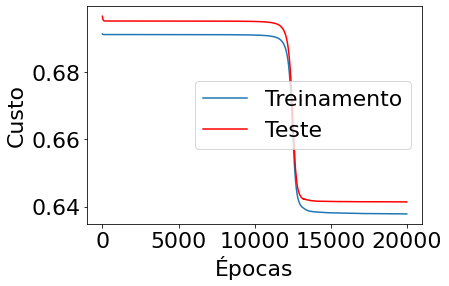

In [204]:
plt.plot(historia_custo)
plt.plot(historia_custo_teste, 'r')
plt.legend(['Treinamento','Teste'])
plt.ylabel('Custo')
plt.xlabel('Épocas')
plt.show()

### Fazendo Previsões

In [205]:
# Previsão
Y_pred, _ = propaga_total(np.transpose(X_teste), valores_parametros, arquitetura)

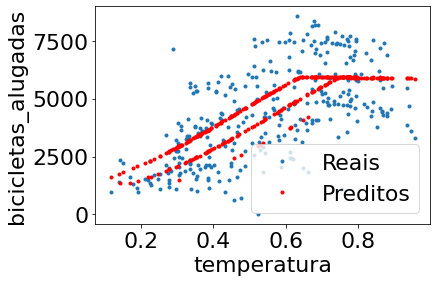

In [206]:
plt.plot(np.transpose(X_teste)[1],ymax*y_teste,'.')
plt.plot(np.transpose(X_teste)[1],ymax*Y_pred.reshape([-1,1]),'.r')
plt.legend(['Reais','Preditos'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('temperatura')
plt.show()

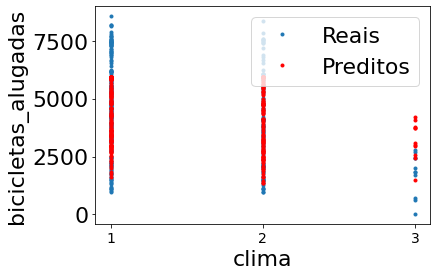

In [207]:
plt.plot(3*np.transpose(X_teste)[0],ymax*y_teste,'.')
plt.plot(3*np.transpose(X_teste)[0],ymax*Y_pred.reshape([-1,1]),'.r')
plt.legend(['Reais','Preditos'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('clima')
plt.rcParams.update({'font.size': 22})
indice=[1,2,3]
plt.xticks(indice, fontsize=14)
plt.show()